## EDA: Diagnosing Diabetes
In this project, you’ll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

Note: This dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure
SkinThickness: Triceps skinfold thickness
Insulin: 2-Hour serum insulin
BMI: Body mass index
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)
Let’s get started!



## Initial Inspection
1. First, familiarize yourself with the dataset here.
Look at each of the nine columns in the documentation.
What do you expect each data type to be?

2. Next, let’s load in the diabetes data to start exploring.
Load the data in a variable called diabetes_data and print the first few rows.
Note: The data is stored in a file called diabetes.csv.




In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # note that codeacademy uses 'codecademylib3_seaborn' which is basically the same
import glob
from scipy import stats


In [6]:

## Make a dataframe
diabetes_data = pd.read_csv("/Users/user/Projects_CodeAcademy/Diabetes Data/diabetes.csv", index_col = 0) 

print(diabetes_data.head())
print(diabetes_data.dtypes)


             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
6                148             72             35        0  33.6   
1                 85             66             29        0  26.6   
8                183             64              0        0  23.3   
1                 89             66             23       94  28.1   
0                137             40             35      168  43.1   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                          
6                               0.627   50        1  
1                               0.351   31        0  
8                               0.672   32        1  
1                               0.167   21        0  
0                               2.288   33        1  
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       

3. How many columns (features) does the data contain?
4. How many rows (observations) does the data contain?


In [10]:
print(diabetes_data.info()) # 8 columns, 768 observations


<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB
None


5. Let’s inspect diabetes_data further.
Do any of the columns in the data contain null (missing) values?


In [11]:
print(diabetes_data.isna().sum()) # no missings

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


6. If you answered no to the question above, not so fast!

While it’s technically true that none of the columns contain null values, that doesn’t necessarily mean that the data isn’t missing any values.
When exploring data, you should always question your assumptions and try to dig deeper.
To investigate further, calculate summary statistics on diabates_data using the .describe() method.

In [17]:
print(diabetes_data.describe()) 

          Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   120.894531      69.105469      20.536458   79.799479   31.992578   
std     31.972618      19.355807      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    140.250000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   

7. Looking at the summary statistics, do you notice anything odd about the following columns?

Glucose
BloodPressure
SkinThickness
Insulin
BMI

-: Standard deviation is very high for Glocose, Blood pressure, Insulin, and skin thickness which indicates the population sample is very mixed as the members of this sample differ from the mean value for the sample.
-: The further, the min values of 0 indicate that we might have missing info which is indicated as 0 since no human can have 0 blood pressure
    


8. Do you spot any other outliers in the data?

<AxesSubplot:>

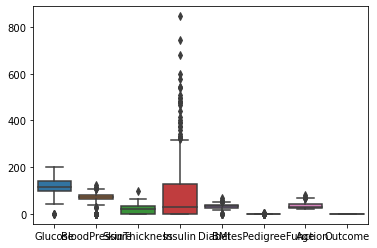

In [28]:
# Calculate quantiles 

Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1

((diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR))).sum() # Gives the number of outliers 

# We can also visualize it in a boxplot

sns.boxplot(data=diabetes_data)

In [22]:
# Using z-score

diabetes_data[(np.abs(stats.zscore(diabetes_data)) < 3).all(axis=1)] 

# For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
# It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
# all(axis=1) ensures that for each row, all column satisfy the constraint.
# Finally, the result of this condition is used to index the dataframe.




,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


9. Let’s see if we can get a more accurate view of the missing values in the data.

Use the following code to replace the instances of 0 with NaN in the five columns mentioned:

diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)



In [29]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
10. Next, check for missing (null) values in all of the columns just like you did in Step 5.
Now how many missing values are there?



In [42]:
print(diabetes_data.isna().sum()) 


Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


11. Let’s take a closer look at these rows to get a better idea of why some data might be missing.
Print out all of the rows that contain missing (null) values.




In [55]:

null = diabetes_data.iloc[:, 0:5].isna() # crate a dataframe for null values (exclude the columns where no missing data occured)


print(null)

# print(diabetes_data[diabetes_data.isnull().any(axis=1)]) solution from codeacademy

             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
6              148.0           72.0           35.0      NaN  33.6   
1               85.0           66.0           29.0      NaN  26.6   
8              183.0           64.0            NaN      NaN  23.3   
5              116.0           74.0            NaN      NaN  25.6   
10             115.0            NaN            NaN      NaN  35.3   
...              ...            ...            ...      ...   ...   
9              170.0           74.0           31.0      NaN  44.0   
9               89.0           62.0            NaN      NaN  22.5   
2              122.0           70.0           27.0      NaN  36.8   
1              126.0           60.0            NaN      NaN  30.1   
1               93.0           70.0           31.0      NaN  30.4   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                     

12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

One thing you might notice is that most rows with missing data have missing values in more than one column. In fact, every single row with at least one missing value also has a missing value in the insulin column. This is a clue as to why this data is missing! If patients did not have their insulin measured, why might they also not have had these other measurements taken?


13. Next, take a closer look at the data types of each column in diabetes_data.



In [58]:
print(diabetes_data.dtypes)

print(diabetes_data.info()) # outcome is an object

Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   763 non-null    float64
 1   BloodPressure             733 non-null    float64
 2   SkinThickness             541 non-null    float64
 3   Insulin                   394 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 74.

In [63]:
14. To figure out whym the Outcome column is of type object (string) instead of type int64, print out the unique values in the Outcome column.



SyntaxError: invalid syntax (<ipython-input-63-bf219bb87dc3>, line 1)

In [64]:
diabetes_data['Outcome'].nunique() #binary 

2

15. How might you resolve this issue?


In [67]:
pd.to_numeric(diabetes_data['Outcome'])
print(diabetes_data.dtypes)


Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


16.Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

Here are some ways you might extend this project if you’d like:

Use .value_counts() to more fully explore the values in each column.
Investigate other outliers in the data that may be easily overlooked.
Instead of changing the 0 values in the five columns to NaN, try replacing the values with the median or mean of each column.